In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.core.array_algos import replace
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline 

C:\Users\binmh\AppData\Local\Temp\ipykernel_23112\683950174.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('ST87253_california_housing_with_labels.csv')

In [3]:
# information about the columns
data.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'labels'],
      dtype='object')

In [4]:
# review of data frame information: dimention, list of variables/features with information about the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels              300 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [5]:
# check the na records in dataframe
data.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
labels                0
dtype: int64

In [6]:
data['labels'].value_counts()

labels
0    221
1     79
Name: count, dtype: int64

In [7]:
# create the train, test data samples by means of train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('labels', axis=1), 
                                                    data['labels'],
                                                    test_size=0.3,
                                                    random_state=100)

# Logistic Regression

## Logistic Regression Model based on Original Data

In [8]:
# create Logistic Regression model
logmodel = LogisticRegression(random_state=100,solver='lbfgs')
logmodel.fit(X_train, Y_train)

C:\Users\binmh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [9]:
logmodel.classes_

array([0, 1], dtype=int64)

In [10]:
# get the inetrcepts for logistic regression models
print('Logistic regression models coefficients of intercepts: ', logmodel.intercept_)

Logistic regression models coefficients of intercepts:  [-0.00449783]


In [11]:
# get the coefficients for logistic regression models
print('Logistic regression models coefficients: ',logmodel.coef_)

Logistic regression models coefficients:  [[-1.31399106e-01  4.45149976e-04 -6.62850156e-03 -1.40022060e-03
   3.56969566e-03 -9.99688090e-03  2.39450653e-05]]


In [12]:
# Generate prediction based on testing data sample
predictions = logmodel.predict(X_test)

### Model Quality Evaluation

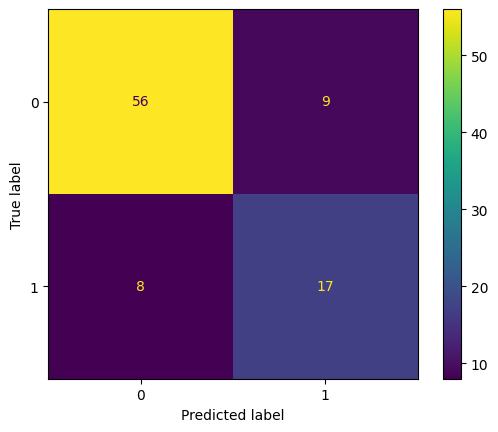

In [13]:
#Generate the confusion matrix
c_matrix = confusion_matrix(Y_test, predictions)
cm = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [0, 1])
cm.plot()

In [14]:
#Generate the created classification models' performamce measures: precision, recall, f1-score, accuracy
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        65
           1       0.65      0.68      0.67        25

    accuracy                           0.81        90
   macro avg       0.76      0.77      0.77        90
weighted avg       0.81      0.81      0.81        90



## Logistic Regression Model based on Scaled Data

### Data Standardization and Preprocessing

In [15]:
scaler = StandardScaler()
num_columns = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
data_scaled = pd.DataFrame(scaler.fit_transform(data[num_columns].values), columns = num_columns)
data_scaled = pd.merge(data_scaled, data[['labels']], left_index=True, right_index=True)

In [16]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels              300 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [17]:
#create the train and test data samples for logistic regression models creation
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(data_scaled.drop('labels', axis=1), data_scaled['labels'], test_size = 0.3, random_state=100 )

### Model Creation

In [18]:
#LRM creation on the base of scaled data
logmodel_scaled = LogisticRegression(multi_class='multinomial',random_state=100,solver='lbfgs')
logmodel_scaled.fit(X_train_scaled, Y_train_scaled)

LogisticRegression(multi_class='multinomial', random_state=100)

In [19]:
# get the inetrcepts for logistic regression models
print('Logistic regression models coefficients of intercepts: ', logmodel_scaled.intercept_)

Logistic regression models coefficients of intercepts:  [-1.4517759]


In [20]:
# get the coefficients for logistic regression models
print('Logistic regression models coefficients: ',logmodel_scaled.coef_)

Logistic regression models coefficients:  [[ 0.17883025  0.24685841 -0.00484078  0.08397193 -0.15305023  0.18249929
   2.6364318 ]]


In [21]:
#prediction on the base of test data sample
predictions_scaled_test = logmodel_scaled.predict(X_test_scaled)

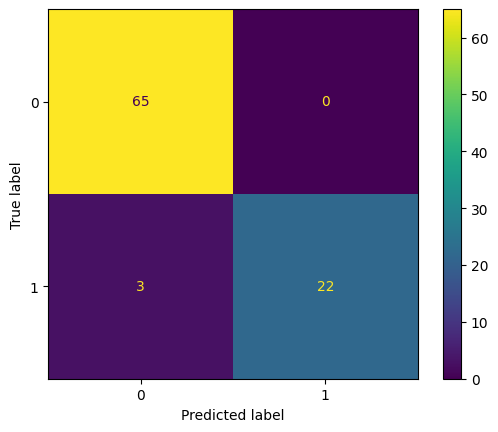

In [22]:
#Generation of confusion matrix
c_matrix = confusion_matrix(Y_test_scaled, predictions_scaled_test)
cm = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [0, 1])
cm.plot()

In [23]:
#Generation of classification report
print(classification_report(Y_test_scaled, predictions_scaled_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.88      0.94        25

    accuracy                           0.97        90
   macro avg       0.98      0.94      0.96        90
weighted avg       0.97      0.97      0.97        90



# Discriminant Analysis

In [24]:
X_train_sc_ar = np.array(X_train_scaled)
X_test_sc_ar = np.array(X_test_scaled)
Y_train_sc_ar = np.array(Y_train_scaled)
Y_test_sc_ar = np.array(Y_test_scaled)

lda = LDA(n_components=1, solver='svd', store_covariance=True)
Xlda = lda.fit(X_train_sc_ar, Y_train_sc_ar)

print("Class Labels:", Xlda.classes_)
print("Number of Features:", Xlda.n_features_in_)
print("Variance Explained by Features:", Xlda.explained_variance_ratio_)
print("Number of Canonical Discriminant Functions:", Xlda.n_components)
print("Scaling Coefficients for Features:\n", Xlda.scalings_)

Class Labels: [0 1]
Number of Features: 7
Variance Explained by Features: [1.]
Number of Canonical Discriminant Functions: 1
Scaling Coefficients for Features:
 [[-0.10591906]
 [ 0.84278504]
 [-0.29216507]
 [ 0.24902042]
 [-0.70225693]
 [-0.32382332]
 [ 1.98278669]]


In [25]:
X_train_sc_ar_t = lda.fit_transform(X_train_sc_ar, Y_train_sc_ar)
X_test_sc_ar_t = lda.transform(X_test_sc_ar)

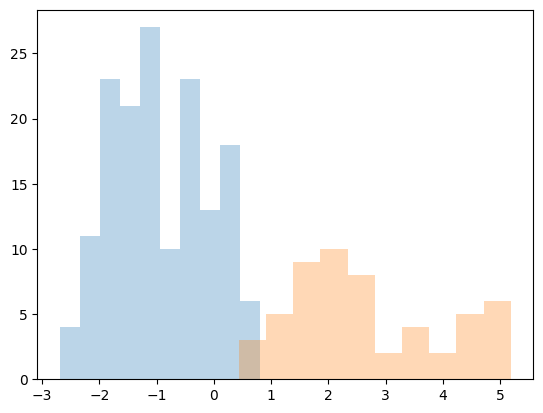

In [26]:
n=len(np.unique(Y_train_sc_ar))
for i in range(0,n):
  plt.hist(X_train_sc_ar_t[Y_train_sc_ar==i, 0],10, alpha=0.3)

(array([ 4., 11., 23., 21., 27., 10., 23., 13., 18.,  6.]),
 array([-2.68657349, -2.33673524, -1.98689699, -1.63705874, -1.2872205 ,
        -0.93738225, -0.587544  , -0.23770575,  0.11213249,  0.46197074,
         0.81180899]),
 <BarContainer object of 10 artists>)

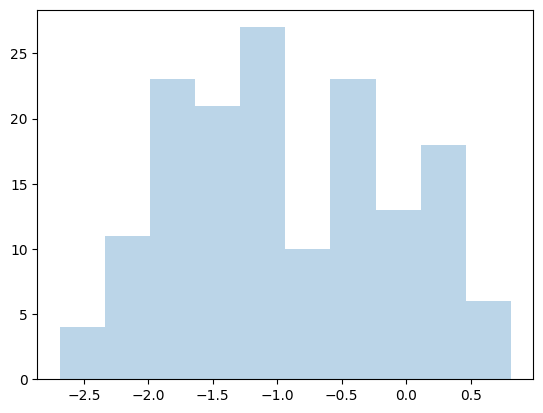

In [27]:
plt.hist(X_train_sc_ar_t[Y_train_sc_ar == 0, 0], 10, alpha=0.3)

(array([ 3.,  5.,  9., 10.,  8.,  2.,  4.,  2.,  5.,  6.]),
 array([0.43753837, 0.91195158, 1.38636478, 1.86077798, 2.33519118,
        2.80960439, 3.28401759, 3.75843079, 4.23284399, 4.7072572 ,
        5.1816704 ]),
 <BarContainer object of 10 artists>)

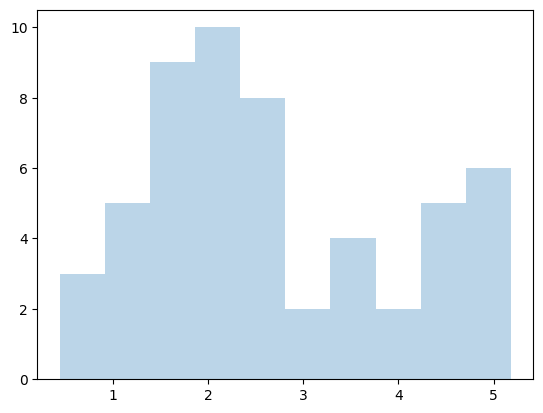

In [28]:
plt.hist(X_train_sc_ar_t[Y_train_sc_ar == 1, 0], 10, alpha=0.3)

## Evaluation of Discriminant Analysis

In [29]:
features = data.columns[data.columns != 'labels']
features = features.tolist()

In [30]:
# Centers of Classes 
means_df = pd.DataFrame(lda.means_, columns=features)
means_df.index = ['Class 0', 'Class 1']
means_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Class 0,0.049917,-0.177361,-0.101475,-0.047548,-0.099167,-0.433973,-0.521273
Class 1,-0.015864,0.355012,0.160010,0.024763,0.131490,1.103448,1.436649


In [31]:
# Overall mean value (center of data sample)
xbar_series = pd.Series(lda.xbar_, index=features)
xbar_table = pd.DataFrame({'Feature': xbar_series.index, 'Overall Mean': xbar_series.values})
xbar_table

,Feature,Overall Mean
0,housing_median_age,0.033002
1,total_rooms,-0.040465
2,total_bedrooms,-0.034236
3,population,-0.028954
4,households,-0.039855
5,median_income,-0.038636
6,median_house_value,-0.017807


In [32]:
np.set_printoptions(precision=3)

In [33]:
cl_number = data['labels'].nunique()
X=np.array(X_train_scaled)
Y=np.array(Y_train_scaled)
mean_vectors = []

for cl in range(0,cl_number):
  mean_vectors.append(np.mean(X[Y==cl], axis=0))
  print('Mean Vector class %s\n: %s\n' %(cl, mean_vectors[cl]))

Mean Vector class 0
: [ 0.05  -0.177 -0.101 -0.048 -0.099 -0.434 -0.521]

Mean Vector class 1
: [-0.016  0.355  0.16   0.025  0.131  1.103  1.437]



In [34]:
n_columns = X.shape[1]
S_W = np.zeros((n_columns, n_columns))
row = np.zeros((1, n_columns))

for cl, mv in zip(range(0, cl_number), mean_vectors):
    class_sc_mat = np.zeros((n_columns, n_columns))
    mv = mv.reshape(n_columns, 1)
    for row in X[Y == cl]:
        row = row.reshape(n_columns, 1)
        class_sc_mat += ((row - mv)).dot((row - mv).T)
    print(cl)
    print(class_sc_mat)
    S_W += class_sc_mat

print('within-class Scatter Matrix:\n', S_W)

0
[[140.048 -44.216 -43.522 -40.021 -40.974 -22.22    3.742]
 [-44.216  98.15  105.626 102.934 107.123  22.019  11.19 ]
 [-43.522 105.626 127.231 122.73  127.71    9.006  10.376]
 [-40.021 102.934 122.73  151.634 128.457  11.637   7.107]
 [-40.974 107.123 127.71  128.457 131.411  12.741  12.677]
 [-22.22   22.019   9.006  11.637  12.741  59.689  27.494]
 [  3.742  11.19   10.376   7.107  12.677  27.494  36.053]]
1
[[ 70.266 -28.242 -19.86  -14.765 -12.329 -26.954   7.016]
 [-28.242  62.987  53.158  40.692  44.085   9.109  -4.126]
 [-19.86   53.158  50.827  36.555  42.268  -5.658  -6.694]
 [-14.765  40.692  36.555  41.693  40.677  -6.364  -9.031]
 [-12.329  44.085  42.268  40.677  44.996 -10.858  -6.519]
 [-26.954   9.109  -5.658  -6.364 -10.858  63.883  21.886]
 [  7.016  -4.126  -6.694  -9.031  -6.519  21.886  29.294]]
within-class Scatter Matrix:
 [[210.314 -72.457 -63.383 -54.786 -53.303 -49.174  10.758]
 [-72.457 161.137 158.784 143.627 151.208  31.127   7.064]
 [-63.383 158.784 17

In [35]:
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((n_columns,n_columns))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[Y==i,:].shape[0]
    mean_vec = mean_vec.reshape(n_columns,1) 
    overall_mean = overall_mean.reshape(n_columns, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[  0.174  -1.405  -0.69   -0.191  -0.609  -4.057  -5.166]
 [ -1.405  11.369   5.584   1.544   4.926  32.833  41.813]
 [ -0.69    5.584   2.743   0.758   2.419  16.126  20.537]
 [ -0.191   1.544   0.758   0.21    0.669   4.46    5.679]
 [ -0.609   4.926   2.419   0.669   2.134  14.225  18.116]
 [ -4.057  32.833  16.126   4.46   14.225  94.817 120.75 ]
 [ -5.166  41.813  20.537   5.679  18.116 120.75  153.776]]


In [36]:
#Eigen values calculation
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(n_columns,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(7,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
ee=np.zeros((7,1))
k=0
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
    ee[k]+=i[0]
    k+=1

eig_df=pd.DataFrame(ee)
eig_df


Eigenvector 1: 
[[-0.999]
 [-0.015]
 [ 0.005]
 [-0.005]
 [ 0.013]
 [ 0.006]
 [-0.036]]
Eigenvalue 1: 0.00e+00

Eigenvector 2: 
[[ 0.046]
 [-0.363]
 [ 0.126]
 [-0.107]
 [ 0.302]
 [ 0.139]
 [-0.853]]
Eigenvalue 2: 2.53e+00

Eigenvector 3: 
[[-0.147]
 [-0.835]
 [ 0.115]
 [-0.171]
 [-0.154]
 [ 0.025]
 [ 0.212]]
Eigenvalue 3: 2.47e-16

Eigenvector 4: 
[[-0.147]
 [-0.835]
 [ 0.115]
 [-0.171]
 [-0.154]
 [ 0.025]
 [ 0.212]]
Eigenvalue 4: 2.47e-16

Eigenvector 5: 
[[ 0.235]
 [ 0.198]
 [ 0.306]
 [ 0.218]
 [-0.864]
 [ 0.108]
 [-0.078]]
Eigenvalue 5: 6.67e-17

Eigenvector 6: 
[[ 0.091]
 [-0.032]
 [ 0.284]
 [-0.953]
 [-0.033]
 [-0.019]
 [ 0.028]]
Eigenvalue 6: 6.83e-18

Eigenvector 7: 
[[-0.019]
 [ 0.026]
 [ 0.907]
 [ 0.396]
 [-0.091]
 [-0.046]
 [-0.096]]
Eigenvalue 7: -3.40e-17
ok
Eigenvalues in decreasing order:

2.5266643272663916
3.6627209630683255e-16
3.6627209630683255e-16
6.668284758054997e-17
3.4001306887915024e-17
6.828407185615007e-18
0.0


,0
0,2.526664e+00
1,3.662721e-16
2,3.662721e-16
3,6.668285e-17
4,3.400131e-17
5,6.828407e-18
6,0.000000e+00


In [37]:
# Canonical correlation calculation
aa=(eig_df.apply(lambda x:x/(x+1),axis=1))
can_cor = aa.apply(np.sqrt)
print(can_cor)

              0
0  8.464313e-01
1  1.913824e-08
2  1.913824e-08
3  8.165957e-09
4  5.831064e-09
5  2.613122e-09
6  0.000000e+00


In [38]:
L = eig_df.apply(lambda x: 1/(x+1),axis=1)
n=X.shape[0]
p=13
g=3
k=-(n-(p+g)/2-1)
LL=pd.DataFrame(np.zeros((7,2)), columns=['Lambda','Chi-sq'])
for j in range(0,len(L)):
  LL.loc[j,'Lambda']=L[0][j]
  for i in range(j,len(L)-1):
    LL.loc[j,'Lambda']=LL.loc[j,'Lambda']*(L[0][i+1])
LL['Chi-sq']=L[0].apply(math.log)
LL['Chi-sq']=LL['Chi-sq']*k
print(LL)

     Lambda        Chi-sq
0  0.283554  2.533308e+02
1  1.000000  8.926193e-14
2  1.000000  8.926193e-14
3  1.000000 -0.000000e+00
4  1.000000 -0.000000e+00
5  1.000000 -0.000000e+00
6  1.000000 -0.000000e+00


In [39]:
print('LDA intercept: ', Xlda.intercept_)
print('LDA coefficients: ', Xlda.coef_)

LDA intercept:  [-4.135]
LDA coefficients:  [[-0.383  3.051 -1.058  0.901 -2.542 -1.172  7.177]]


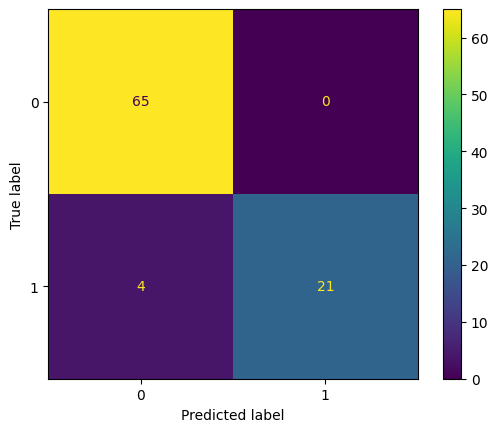

In [40]:
lda_predictions = lda.predict(X_test_sc_ar)
c_matrix = confusion_matrix(Y_test_sc_ar, lda_predictions)
cm = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [0, 1])
cm.plot()

In [41]:
Xlda.score(X_test_sc_ar, Y_test_sc_ar)

0.9555555555555556

In [42]:
print(classification_report(Y_test_sc_ar, lda_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.84      0.91        25

    accuracy                           0.96        90
   macro avg       0.97      0.92      0.94        90
weighted avg       0.96      0.96      0.95        90



# Logistic Regression model on the basis of rescaled data by CDF

In [43]:
LogModel_lda = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=100)
LogModel_lda.fit(X_train_sc_ar_t, Y_train_sc_ar)

LogisticRegression(multi_class='multinomial', random_state=100)

In [44]:
Y_pred = LogModel_lda.predict(X_test_sc_ar_t)
confusion_matrix(Y_test_sc_ar, Y_pred)

array([[65,  0],
       [ 3, 22]], dtype=int64)

In [45]:
print(classification_report(Y_test_sc_ar, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.88      0.94        25

    accuracy                           0.97        90
   macro avg       0.98      0.94      0.96        90
weighted avg       0.97      0.97      0.97        90

